# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [69]:
# passo a paaso de um projeto de ciencia de dados
# entendimento do desafio
# entendimento da área/empresa
       # prever o preço de um barco baseado nas caracteristicas dele( ano, modelo, material, usado/novo, etc)
    
# extraçao/ obtençao de dados
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


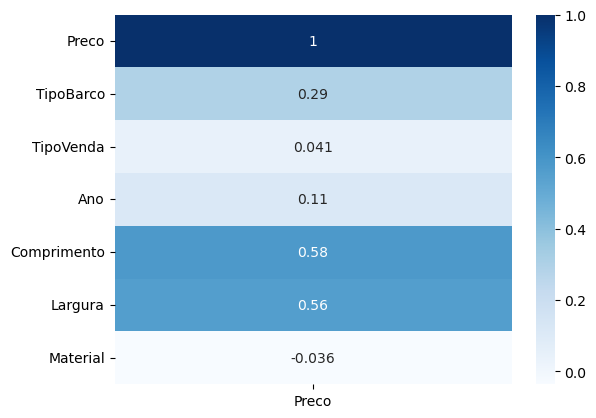

In [70]:
# ajuste de dados (tratamento e limpeza)
   # correlaçao entre as informçoes da base de dados 
correlacao = (tabela.corr()[["Preco"]])
display(correlacao)

# análise exploratória
# duas bibliotecas de gráfico
import seaborn as sns
import matplotlib.pyplot as plt



# cria o gráfico
sns.heatmap(correlacao, cmap="Blues", annot=True)

# exibe o gráfico
plt.show()

In [71]:
# modelagem + algoritmo (aqui que entra a inteligencia artificial, se necessario)
      # dividir a base em x e y
y = tabela['Preco']
# axis = 0 -> linhas, axis = 1 -> colunas
x = tabela.drop('Preco', axis=1)

# train test split
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [72]:

# importar a inteligencia artificial
# RegresssaoLinear e ArvoreDeDecisao
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligencia artificial
modelo_regressaoLinear = LinearRegression()
modelo_arvoreDecisao = RandomForestRegressor()

# treinar a inteligencia artificial
modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoreDecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [73]:
# interpretaçao de resultados

# escolher o melhor modelo
from sklearn.metrics import r2_score
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoreDecisao = modelo_arvoreDecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaoLinear ))
print(r2_score(y_teste, previsao_arvoreDecisao ))
# visualizazr as previsoes

# fazer novas previsoes (usando a inteligencia artificial na prática)

0.3771541188192036
0.7991962016954575


<function matplotlib.pyplot.show(close=None, block=None)>

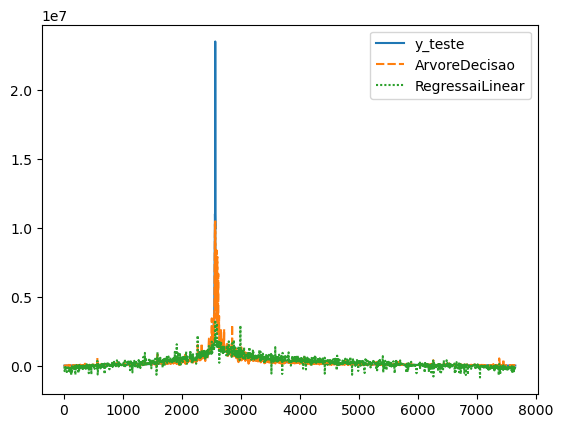

In [74]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar ["y_teste"] = y_teste
tabela_auxiliar ["ArvoreDecisao"] = previsao_arvoreDecisao
tabela_auxiliar ["RegressaiLinear"] = previsao_regressaoLinear

sns.lineplot(data= tabela_auxiliar)
plt.show

In [75]:
tabela_nova=pd.read_csv('novos_barcos.csv')
display(tabela_nova)

previsao = modelo_arvoreDecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 7427.30416667 11174.47666667 17564.5       ]
